# Exploration of B-SNIP Data 

In this notebook:
1.   List item
2.   List item

___

## Upload files
(files need to be uploaded each time  from the local machine since it's sensitive medical data)

In [ ]:
from google.colab import files
import glob, os
import pandas as pd

In [1]:
# upload of files from the local machine 

uploaded = files.upload()

Saving akts01.txt to akts01.txt
Saving bac01.txt to bac01.txt
Saving bis01.txt to bis01.txt
Saving demod01.txt to demod01.txt
Saving eeg_sub_files01.txt to eeg_sub_files01.txt
Saving et_subject_experiment01.txt to et_subject_experiment01.txt
Saving fh01.txt to fh01.txt
Saving iec01.txt to iec01.txt
Saving image03.txt to image03.txt
Saving letsca01.txt to letsca01.txt
Saving madrs01.txt to madrs01.txt
Saving meds01.txt to meds01.txt
Saving ndar_subject01.txt to ndar_subject01.txt
Saving panss01.txt to panss01.txt
Saving pmh01.txt to pmh01.txt
Saving psychosocial01.txt to psychosocial01.txt
Saving ses01.txt to ses01.txt
Saving sfs01.txt to sfs01.txt
Saving sidp01.txt to sidp01.txt
Saving wms_3_adult02.txt to wms_3_adult02.txt
Saving wrat401.txt to wrat401.txt
Saving ymrs01.txt to ymrs01.txt


In [7]:
# read files and change into dataframes

data_folder = os.path.join(os.getcwd())
fnames = [f[:-4] for f in glob.glob('*.txt')]
data = {}
for fn in fnames:
      df = pd.read_csv(os.path.join(data_folder,fn + '.txt'),  sep='\t')
      data[fn] = df.iloc[1:] 

## Prepear Data for Visualizations

In [10]:
# create a united df (all_subs) which checkes if there is information about each specific subject at each file

all_subs = data['iec01'][{'src_subject_id', 'study'}].copy()
all_subs = all_subs.drop_duplicates(subset=['src_subject_id'])

for fn in fnames:
    in_file = []
    print('going through subjects in {}'.format(fn))
    for idx, sub in enumerate(all_subs.src_subject_id):
        sub = int(sub)
        in_file.append(int(sub in data[fn].src_subject_id))
    all_subs['{}'.format(fn)] = in_file

going through subjects in image03
going through subjects in meds01
going through subjects in panss01
going through subjects in wms_3_adult02
going through subjects in psychosocial01
going through subjects in et_subject_experiment01
going through subjects in ses01
going through subjects in ndar_subject01
going through subjects in ymrs01
going through subjects in fh01
going through subjects in iec01
going through subjects in sfs01
going through subjects in wrat401
going through subjects in letsca01
going through subjects in bis01
going through subjects in bac01
going through subjects in pmh01
going through subjects in demod01
going through subjects in akts01
going through subjects in sidp01
going through subjects in madrs01
going through subjects in eeg_sub_files01


In [ ]:
# create a count df with number of participants in each study * diagnosis

diagnosis = all_subs.study.unique()
count_subs = pd.DataFrame(columns=diagnosis, index=fnames) 

for fn in fnames:
    for dig in diagnosis:
         count_subs[dig][fn] = all_subs.loc[all_subs.study == dig, fn].sum()

In [30]:
# define a map from long to short diagnosis names 

diagnosis_map = {
           'Proband with Schizoaffective Disorder': 'Schizoaffective',
           'Relative of Proband with Schizophrenia': 'Schizophrenia Relavite', 
           'Proband with Schizophrenia': 'Schizophrenia', 
           'Relative of Proband with Schizoaffective Disorder': 'Schizoaffective Relative', 
           'Proband with Psychotic Bipolar Disorder': 'Bipolar', 
           'Relative of Proband with Psychotic Bipolar Disorder': 'Bipolar Relative'
           }

diagnosis_gender_ord = ['Schizophrenia_F', 'Schizophrenia_M', 'Schizophrenia Relavite_F', 'Schizophrenia Relavite_M',
                        'Schizoaffective_F', 'Schizoaffective_M', 'Schizoaffective Relative_F', 'Schizoaffective Relative_M',  
                        'Bipolar_F', 'Bipolar_M', 'Bipolar Relative_F', 'Bipolar Relative_M',  'Healthy Control_F', 
                        'Healthy Control_M']

diagnosis_ord = ['Schizophrenia', 'Schizophrenia Relavite', 'Schizoaffective', 'Schizoaffective Relative', 'Bipolar', 'Bipolar Relative', 'Healthy Control']

In [31]:
# adjust the count df for visualization (change names, order etc.) 

count_subs_plt = count_subs.copy()

columns = diagnosis_map

rows = {
    'image03': 'MRI', 
    'sidp01': 'DSM', 
    'wms_3_adult02': 'spans score', 
    'ymrs01': 'YRMS',
    'demod01': 'demographics', 
    'ses01': 'education', 
    'sfs01': 'finances', 
    'panss01': 'PANSS', 
    'bac01': 'BAC', 
    'psychosocial01': 'psychosocial', 
    'bis01': 'impulsivity', 
    'letsca01': 'sucide scale', 
    'madrs01': 'MADRS', 
    'meds01': 'medication',
    'eeg_sub_files01': 'EEG', 
    'pmh01': 'medical info', 
    'wrat401': 'reading score', 
    'et_subject_experiment01': 'Eye tracking', 
    'ndar_subject01': 'family info', 
    'akts01': 'interview', 
    'fh01': 'family mental illness'
      }

count_subs_plt.rename(columns, axis='columns', inplace=True) 

count_subs_plt = count_subs_plt.reindex(columns=diagnosis_ord)

count_subs_plt.rename(rows, axis='rows', inplace=True) 
rows_ord = ['EEG', 'Eye tracking', 'MRI', 'DSM', 
            'spans score', 'reading score', 'BAC', #cognitive 
            'PANSS', 'YRMS', 'MADRS', 'psychosocial', 'interview',  'impulsivity', #psychological
            'demographics', 'medical info', 'medication', 'sucide scale',  #info
            'family info', 'education', 'finances', 'family mental illness']

count_subs_plt = count_subs_plt.reindex(index=rows_ord)

In [ ]:
# create a df of EEG data - which is the file of 'eeg_sub_files01'

diag_data  = all_subs[{'src_subject_id', 'study'}].copy()
diag_data['diagnosis'] =  diag_data['study'].map(diagnosis_map)
diag_data.dropna(subset = ["diagnosis"], inplace=True)

eeg_data = data['eeg_sub_files01']
eeg_data['comments_misc'].unique()

eeg_data['measurment'] = eeg_data['comments_misc'].map({'Oddball': 'task', 'RestEyesClosed': 'rest', 'Gating': 'task', 
                                                  'Polhemus': 'task', 'RestEyesOpen': 'rest', 'Unknown': 'Unknown', 
                                                  'Gating3': 'task', 'Gating3': 'task', 'Gating2': 'task', 
                                                  'Rest': 'rest'})

eeg_data['src_subject_id'] = eeg_data['src_subject_id'].astype(str)
diag_data['src_subject_id'] = diag_data['src_subject_id'].astype(str)
eeg_data = eeg_data.merge(diag_data, how='left', on='src_subject_id')
eeg_data = eeg_data.merge(data['panss01'][['src_subject_id', 'panss_general', 'panss_negative', 'panss_positive', 'panss_total']], how='left', on='src_subject_id')

eeg_data['diagnosis_gender'] = eeg_data['diagnosis'] + '_' + eeg_data['sex']
eeg_data['age'] = (eeg_data['interview_age'].astype(float) / 12).round()

## Data Exploration

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2
from collections import Counter
import seaborn as sns
import os

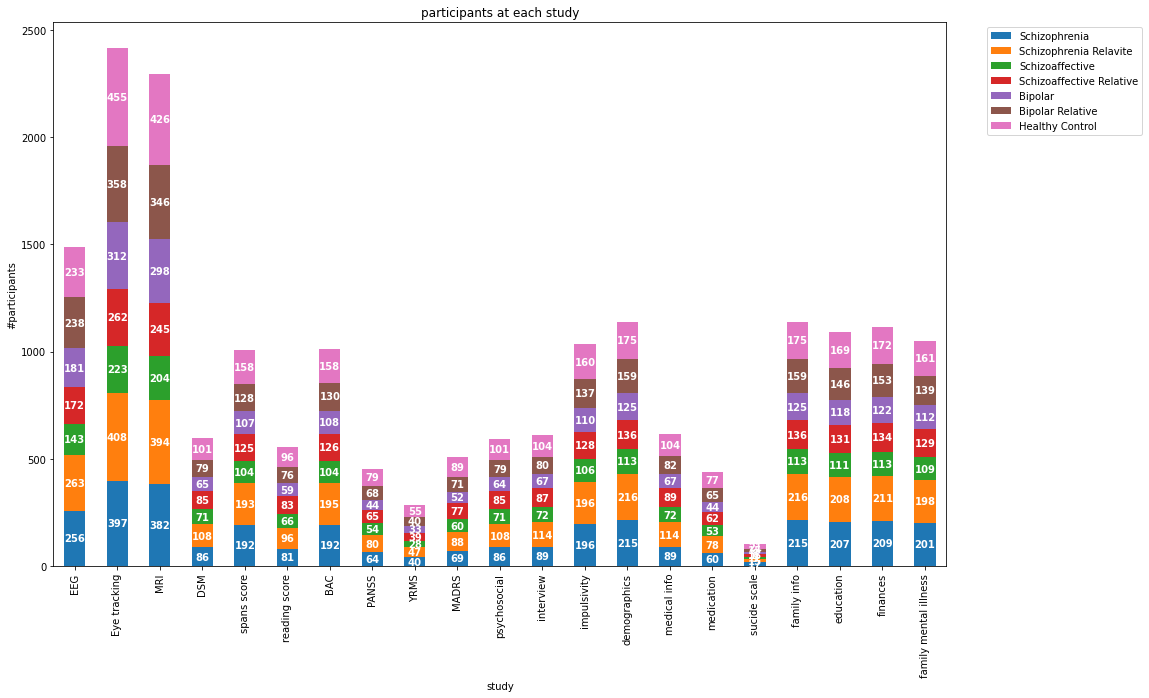

In [32]:
# figure: number of participans at each diagnosis vs. type of study

ax = count_subs_plt.plot.bar(stacked = True, figsize=(16,10), 
                             title="participants at each study", 
                             xlabel='study', ylabel='#participants');

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color="white", 
            fontweight="bold")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.savefig("subjects_at_experiments.png")

plt.show()

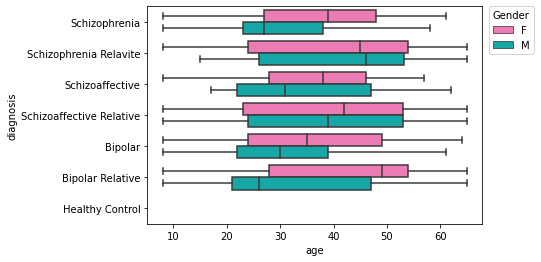

In [33]:
# figure: age vs. diagnosis


sns.boxplot(x="age", y="diagnosis", hue="sex", order=diagnosis_ord,
                 data=eeg_data, palette=['hotpink', 'c'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,  title='Gender')

Text(0.5, 1.0, 'Year of Measurement')

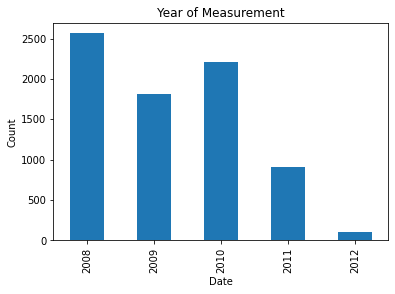

In [ ]:
# figure: distribution of date of measuremnt 

eeg_data['interview_date'] = eeg_data['interview_date'].astype("datetime64")
eeg_data['interview_date'].groupby([eeg_data["interview_date"].dt.year]).count().plot(kind="bar")
plt.xlabel("Date")
plt.ylabel("Count")
plt.title('Year of Measurement')

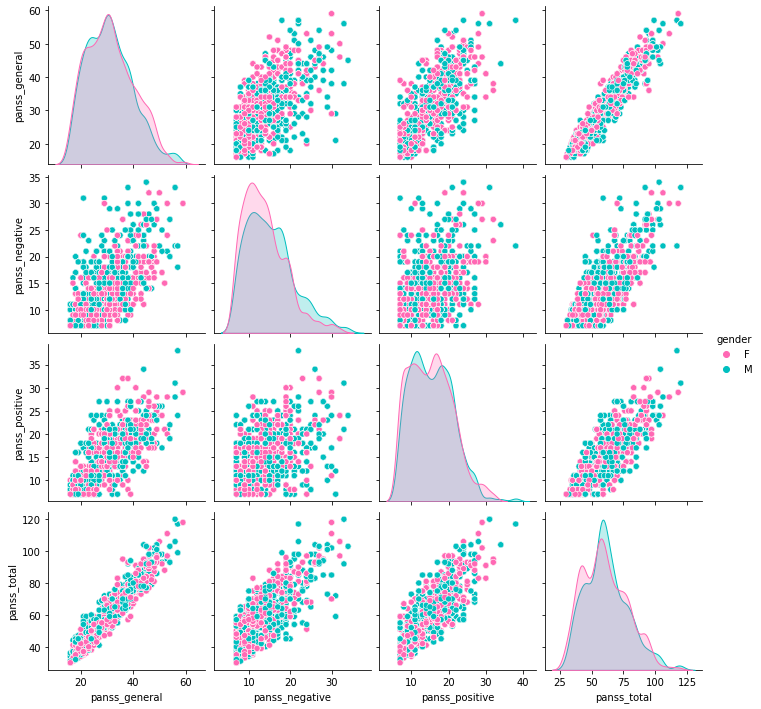

In [ ]:
# figure: correlation between PANSS results for fe/males

df_panss = pd.DataFrame()
df_panss['panss_general'] = eeg_data['panss_general'].astype(float)
df_panss['panss_negative'] = eeg_data['panss_negative'].astype(float)
df_panss['panss_positive'] = eeg_data['panss_positive'].astype(float)
df_panss['panss_total'] = eeg_data['panss_total'].astype(float)

df_panss['gender'] = eeg_data['sex']
df_panss.dropna()

sns.pairplot(df_panss, vars=df_panss.columns[:-1], hue='gender',  palette=['hotpink', 'c'])

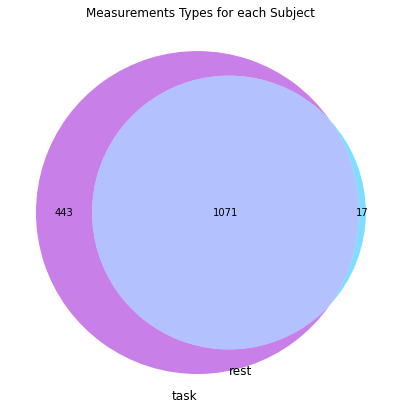

"\n# also checked for each diagnosis of interest but it was not informative \n\nsub_eeg = eeg_data[eeg_data['study'] == 'Healthy Control']\nv_count = sub_eeg.groupby('src_subject_id')['measurment'].apply(lambda x: tuple(set(x))).value_counts()[:-1]\n"

In [26]:
# figure: venn diagram of types of EEG measurements (all tasks as task)
  
v_count = eeg_data.groupby('src_subject_id')['measurment'].apply(lambda x: tuple(set(x))).value_counts()[:-1]


sets = Counter()               #set order A, B   
sets['10'] = v_count.values[1] #10 denotes A on, B off 
sets['01'] = v_count.values[2] #01 denotes A off, B on 
sets['11'] = v_count.values[0]   #11 denotes A on, B on 
labels = ('task', 'rest')  
plt.figure(figsize=(7,7)) 
ax = plt.gca() 
venn2(subsets=sets, set_labels=labels, ax=ax,set_colors=
          ('darkviolet','deepskyblue'),alpha=0.5) 
plt.title('Measurements Types for each Subject')
plt.show()

'''
# also checked for each diagnosis of interest but it was not informative 

sub_eeg = eeg_data[eeg_data['study'] == 'Healthy Control']
v_count = sub_eeg.groupby('src_subject_id')['measurment'].apply(lambda x: tuple(set(x))).value_counts()[:-1]
'''

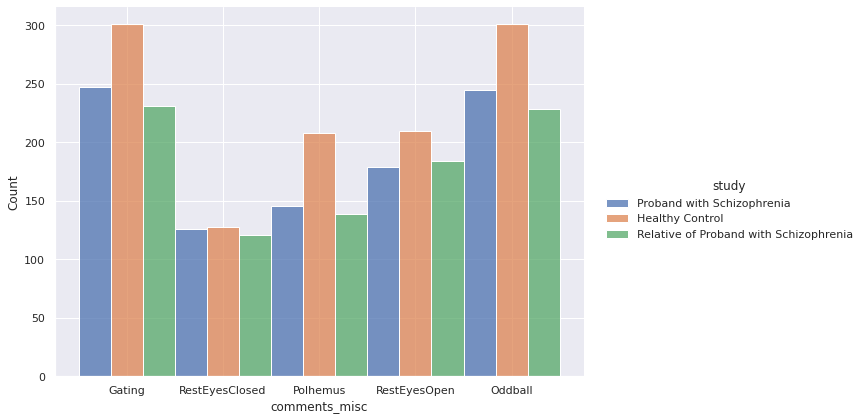

In [ ]:
# figure: box plot - types of tasks for each diagnosis

sns.displot(eeg_data[(eeg_data['study'].isin(['Proband with Schizophrenia','Relative of Proband with Schizophrenia','Healthy Control'])) & 
                     (eeg_data['comments_misc'].isin(['Gating','RestEyesClosed','Polhemus', 'RestEyesOpen', 'Oddball'] ))],
            x="comments_misc", hue="study", multiple="dodge", height=6, aspect=11.7/8.27)
